# Simple model showing labelled and unlabelled images

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [3]:
from fastai.vision.all import *

In [4]:
path = Path('../input/barcode-detection-annotated-dataset')

In [5]:
path.ls()

(#2) [Path('../input/barcode-detection-annotated-dataset/0'),Path('../input/barcode-detection-annotated-dataset/1')]

In [6]:
zeros = (path/'0').ls()
ones = (path/'1').ls()

In [7]:
zeros[:6], ones [:6]

((#6) [Path('../input/barcode-detection-annotated-dataset/0/20201211_1178_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_1168_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_2282_rgb.txt'),Path('../input/barcode-detection-annotated-dataset/0/20201211_167_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_859_rgb.txt'),Path('../input/barcode-detection-annotated-dataset/0/20201211_1209_rgb.txt')],
 (#6) [Path('../input/barcode-detection-annotated-dataset/1/20201211_3600_rgb.txt'),Path('../input/barcode-detection-annotated-dataset/1/20201211_3605_rgb.png'),Path('../input/barcode-detection-annotated-dataset/1/20201211_6138_rgb.txt'),Path('../input/barcode-detection-annotated-dataset/1/20201211_2198_rgb.png'),Path('../input/barcode-detection-annotated-dataset/1/20201211_1066_rgb.png'),Path('../input/barcode-detection-annotated-dataset/1/20201211_2040_rgb.png')])

In [ ]:
im =  Image.open(zeros[0])
im.to_thumb(128,128)

In [8]:
import re

def get_y(ypath):
    return re.findall("/\d.", ypath)[0]

get_y('../input/barcode-detection-annotated-dataset/1/20201211_100_rgb.png')

'/1/'

In [9]:
get_image_files(path)

(#1034) [Path('../input/barcode-detection-annotated-dataset/0/20201211_1178_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_1168_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_167_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_1034_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_2560_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_119_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_236_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_1216_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_3091_rgb.png'),Path('../input/barcode-detection-annotated-dataset/0/20201211_1512_rgb.png')...]

In [10]:
codes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(seed=42),
                  get_y = parent_label,
                  item_tfms = Resize(460),
                  batch_tfms = aug_transforms(size=224, min_scale=0.75)
                  )

dls = codes.dataloaders(path)

In [11]:
#dls.show_batch??

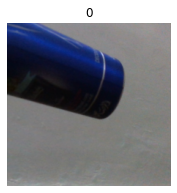

In [12]:
dls.show_batch()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


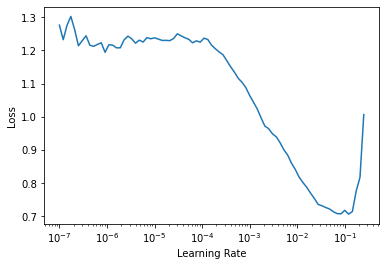

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [14]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.20e-02, steepest point: 7.59e-07


In [16]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.012614,0.449320,0.203883,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.445168,0.169103,0.082524,00:33
1,0.322403,0.103428,0.038835,00:34


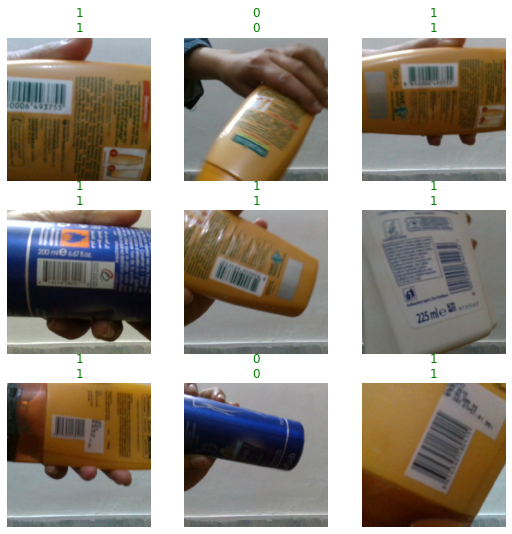

In [17]:
learn.show_results()